In [34]:
import matplotlib.pyplot as plt
import numpy as np
A = np.array(
 [[0.0,                  0.5,                 0.0],
 [0.0 ,                 0.0 ,                2.0],
 [0.9826447948697449,  -1.4832993238602994,  2.9839548722874887]])
B = np.array([[0.0],
 [0.0],
 [0.5]])
C = np.array([-0.20949472809852687,  0.16104859918345404,  -0.11230513137753828])
D = np.array([0.0])
x0 = np.array([[-222.50754436866842, -443.5803057822434, -221.08016956185642], [-183.44776919376798, -365.3228418820793, -181.87074036324117]]).T 
print(A, B, C)

ballbeam  = np.loadtxt('/home/jonhlucas/Downloads/periodo atual/TCC/NARX_MISO/data/ballbeam.dat')
print(ballbeam.shape)
part = ballbeam.shape[0] // 2 - 1#700

u = ballbeam[:part, 0].reshape((1,-1))
y = ballbeam[:part, 1].reshape((1,-1))

uval = ballbeam[part:-2, 0].reshape((1,-1))
yval = ballbeam[part:, 1].reshape((1,-1))
size = part
u_input = np.vstack((u, uval))


[[ 0.          0.5         0.        ]
 [ 0.          0.          2.        ]
 [ 0.98264479 -1.48329932  2.98395487]] [[0. ]
 [0. ]
 [0.5]] [-0.20949473  0.1610486  -0.11230513]
(1000, 2)


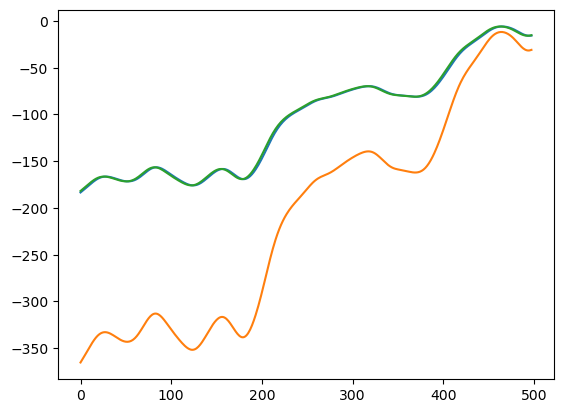

In [54]:
ts = 0.1
n = 3
index = 1

yhat = np.zeros((1, size), np.float64)
yhat[0, 0] = 0.009256486418812661

x = np.zeros((n, size), np.float64)
dx = np.zeros((n, 1), np.float64)
#x0 = np.array([[-0.0322628410740374], [-0.11037727487313204], [0.06634299115947608]])
x[:, 0] = x0[:, index]

for i in range(1, size-1):
    yhat[0, i] = C @ x[:, i-1]
    x[:, i:i+1] = A @ x[:, i-1:i] + B * u_input[index, i-1]
    #print((yhat[0, i]), x[0, i-1], x[1, i-1], x[2, i-1], uval[0, i-1])

plt.plot(x[0, :-1].T, label="x")
plt.plot(x[1, :-1].T, label="y")
plt.plot(x[2, :-1].T, label="z")
plt.show()

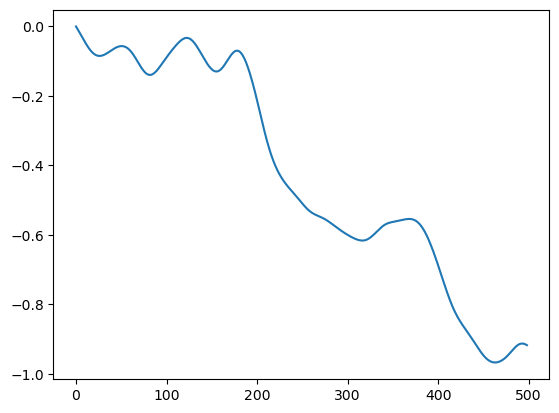

In [62]:
z = np.zeros((1, size), np.float64)
z[0, :3] = x[2, :3]

for i in range(3, size):
    z[0, i] = 0.9826447948697449 * z[0, i-3]  -1.4832993238602994 * 2 * z[0, i-2] + 2.9839548722874887 * z[0, i-1] + 0.5  * u_input[index, i-1]

#print(z[0, :10])

plt.plot((z / x[2, 0] - 1).T)
#plt.plot(uval.T*10)
plt.show()

[-0.0001     -0.0001      0.02270918  0.02369838  0.02487082  0.02612917
  0.02737761  0.02854925  0.02949891  0.03013477]


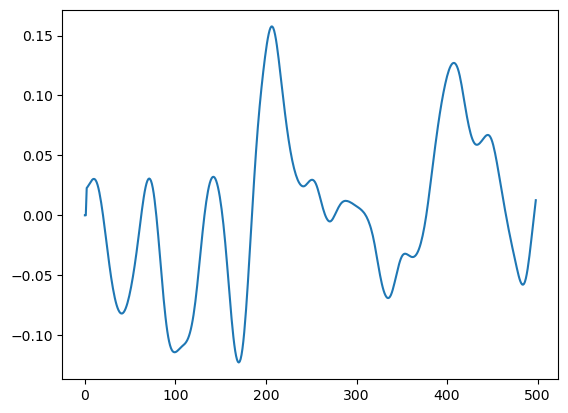

In [68]:
s = np.zeros((1, size), np.float64)
s[0, :2] = -0.0001
Cn = C.copy()
Cn[1] = C[1] * 2
for i in range(2, size):
    s[0, i] = Cn @ z[0, i-2:i+1]
    #s[0, i] = 0.20949472809852687 * z[0, i-2] - 0.16104859918345404 * 2 * z[0, i-1] + 0.11230513137753828 * z[0, i] 

print(s[0, :10])

plt.plot(s.T)
plt.show()

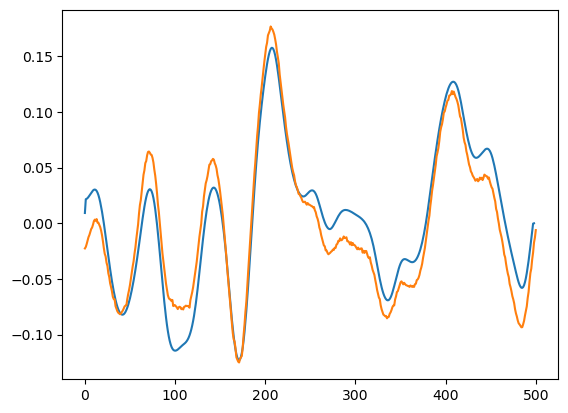

In [69]:
plt.plot(yhat.T)
plt.plot(yval.T)
plt.show()